In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
# Importing necessary libraries
import pandas as pd

# Path to your CSV file
file_path = 'loan_data.csv'

# Read the CSV file into a DataFrame
try:
    loan_data = pd.read_csv(file_path)
    print("Data loaded successfully.")
except FileNotFoundError:
    print("File not found. Please provide the correct file path.")

Data loaded successfully.


In [8]:
# Assign loan_data DataFrame to a new variable df
df = loan_data.copy()

# Display the first few rows of the DataFrame
print("\nFirst few rows of the DataFrame:")
print(df.head())

# Summary statistics of the DataFrame
print("\nSummary statistics of the DataFrame:")
print(df.describe())

# Information about the DataFrame
print("\nInformation about the DataFrame:")
print(df.info())


First few rows of the DataFrame:
   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully

In [9]:
# Convert 'credit.policy' and 'not.fully.paid' columns to boolean type
df['credit.policy'] = df['credit.policy'].astype(bool)
df['not.fully.paid'] = df['not.fully.paid'].astype(bool)

# Display the first few rows of the DataFrame to verify the changes
print("\nFirst few rows of the DataFrame after conversion:")
print(df.head())

# Summary statistics of the DataFrame
print("\nSummary statistics of the DataFrame:")
print(df.describe())

# Information about the DataFrame
print("\nInformation about the DataFrame:")
print(df.info())


First few rows of the DataFrame after conversion:
   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0           True  debt_consolidation    0.1189       829.10       11.350407   
1           True         credit_card    0.1071       228.22       11.082143   
2           True  debt_consolidation    0.1357       366.86       10.373491   
3           True  debt_consolidation    0.1008       162.34       11.350407   
4           True         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  p

          int.rate  installment  log.annual.inc          dti         fico  \
count  9578.000000  9578.000000     9578.000000  9578.000000  9578.000000   
mean      0.122640   319.089413       10.932117    12.606679   710.846314   
std       0.026847   207.071301        0.614813     6.883970    37.970537   
min       0.060000    15.670000        7.547502     0.000000   612.000000   
25%       0.103900   163.770000       10.558414     7.212500   682.000000   
50%       0.122100   268.950000       10.928884    12.665000   707.000000   
75%       0.140700   432.762500       11.291293    17.950000   737.000000   
max       0.216400   940.140000       14.528354    29.960000   827.000000   

       days.with.cr.line     revol.bal   revol.util  inq.last.6mths  \
count        9578.000000  9.578000e+03  9578.000000     9578.000000   
mean         4560.767197  1.691396e+04    46.799236        1.577469   
std          2496.930377  3.375619e+04    29.014417        2.200245   
min           178.9583

In [10]:
# Calculate unique values and their counts for the specified features
inq_counts = df['inq.last.6mths'].value_counts(normalize=False).sort_index()
delinq_counts = df['delinq.2yrs'].value_counts(normalize=False).sort_index()
pub_rec_counts = df['pub.rec'].value_counts(normalize=False).sort_index()

# Print sorted unique values, counts, and percentages for each feature
print("Unique values, counts, and percentages for 'inq.last.6mths':")
for value, count, percentage in zip(inq_counts.index, inq_counts.values, inq_counts.values / len(df)):
    print(f"{value}: Count: {count}, Percentage: {percentage*100:.2f}%")

print("\nUnique values, counts, and percentages for 'delinq.2yrs':")
for value, count, percentage in zip(delinq_counts.index, delinq_counts.values, delinq_counts.values / len(df)):
    print(f"{value}: Count: {count}, Percentage: {percentage*100:.2f}%")

print("\nUnique values, counts, and percentages for 'pub.rec':")
for value, count, percentage in zip(pub_rec_counts.index, pub_rec_counts.values, pub_rec_counts.values / len(df)):
    print(f"{value}: Count: {count}, Percentage: {percentage*100:.2f}%")


Unique values, counts, and percentages for 'inq.last.6mths':
0: Count: 3637, Percentage: 37.97%
1: Count: 2462, Percentage: 25.70%
2: Count: 1384, Percentage: 14.45%
3: Count: 864, Percentage: 9.02%
4: Count: 475, Percentage: 4.96%
5: Count: 278, Percentage: 2.90%
6: Count: 165, Percentage: 1.72%
7: Count: 100, Percentage: 1.04%
8: Count: 72, Percentage: 0.75%
9: Count: 47, Percentage: 0.49%
10: Count: 23, Percentage: 0.24%
11: Count: 15, Percentage: 0.16%
12: Count: 15, Percentage: 0.16%
13: Count: 6, Percentage: 0.06%
14: Count: 6, Percentage: 0.06%
15: Count: 9, Percentage: 0.09%
16: Count: 3, Percentage: 0.03%
17: Count: 2, Percentage: 0.02%
18: Count: 4, Percentage: 0.04%
19: Count: 2, Percentage: 0.02%
20: Count: 1, Percentage: 0.01%
24: Count: 2, Percentage: 0.02%
25: Count: 1, Percentage: 0.01%
27: Count: 1, Percentage: 0.01%
28: Count: 1, Percentage: 0.01%
31: Count: 1, Percentage: 0.01%
32: Count: 1, Percentage: 0.01%
33: Count: 1, Percentage: 0.01%

Unique values, counts, an

In [11]:
# Define the custom binning function
def custom_binning(value):
    if value == 0:
        return 'bin1'
    elif value in [1, 2]:
        return 'bin2'
    elif value in [3, 4, 5]:
        return 'bin3'
    else:
        return 'bin4'

# Apply the custom binning function to 'inq.last.6mths' feature
df['inq_bins'] = df['inq.last.6mths'].apply(custom_binning)

# Calculate distribution of new discrete labels with counts and percentages
inq_bins_distribution = df['inq_bins'].value_counts(normalize=True)

# Print distribution of new discrete labels with counts and percentages
print("Distribution of new discrete labels ('inq_bins') with counts and percentages:")
print(inq_bins_distribution * 100)
print("\nCounts:")
print(df['inq_bins'].value_counts())

Distribution of new discrete labels ('inq_bins') with counts and percentages:
inq_bins
bin2    40.154521
bin1    37.972437
bin3    16.882439
bin4     4.990603
Name: proportion, dtype: float64

Counts:
inq_bins
bin2    3846
bin1    3637
bin3    1617
bin4     478
Name: count, dtype: int64


In [12]:
# Define the custom binning function
def custom_binning_delinq(value):
    if value == 0:
        return 'bin1'
    elif value == 1:
        return 'bin2'
    else:
        return 'bin3'

# Apply the custom binning function to 'delinq.2yrs' feature
df['delinq_bins'] = df['delinq.2yrs'].apply(custom_binning_delinq)

# Calculate distribution of new discrete labels with counts and percentages
delinq_bins_distribution = df['delinq_bins'].value_counts(normalize=True)

# Print distribution of new discrete labels with counts and percentages
print("Distribution of new discrete labels ('delinq_bins') with counts and percentages:")
print(delinq_bins_distribution * 100)
print("\nCounts:")
print(df['delinq_bins'].value_counts())

Distribution of new discrete labels ('delinq_bins') with counts and percentages:
delinq_bins
bin1    88.306536
bin2     8.686573
bin3     3.006891
Name: proportion, dtype: float64

Counts:
delinq_bins
bin1    8458
bin2     832
bin3     288
Name: count, dtype: int64


In [13]:
# Define the custom binning function
def custom_binning_pub_rec(value):
    if value == 0:
        return 'bin1'
    else:
        return 'bin2'

# Apply the custom binning function to 'pub.rec' feature
df['pub_rec_bins'] = df['pub.rec'].apply(custom_binning_pub_rec)

# Calculate distribution of new discrete labels with counts and percentages
pub_rec_bins_distribution = df['pub_rec_bins'].value_counts(normalize=True)

# Print distribution of new discrete labels with counts and percentages
print("Distribution of new discrete labels ('pub_rec_bins') with counts and percentages:")
print(pub_rec_bins_distribution * 100)
print("\nCounts:")
print(df['pub_rec_bins'].value_counts())

Distribution of new discrete labels ('pub_rec_bins') with counts and percentages:
pub_rec_bins
bin1    94.163708
bin2     5.836292
Name: proportion, dtype: float64

Counts:
pub_rec_bins
bin1    9019
bin2     559
Name: count, dtype: int64


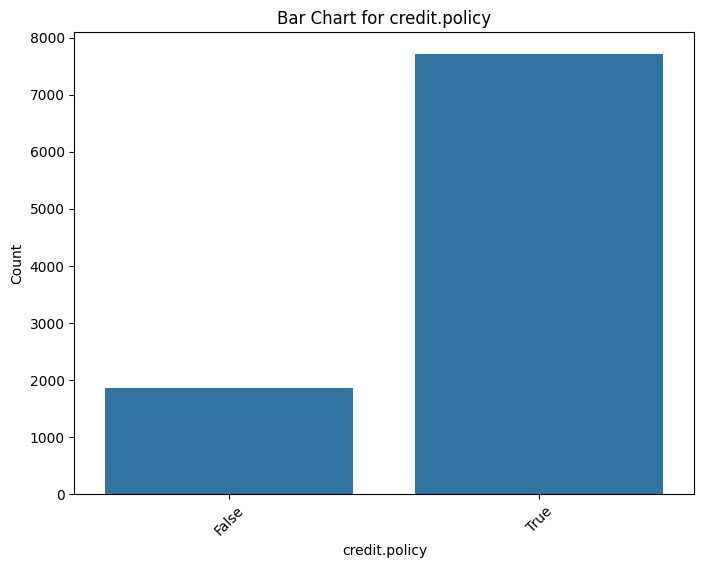

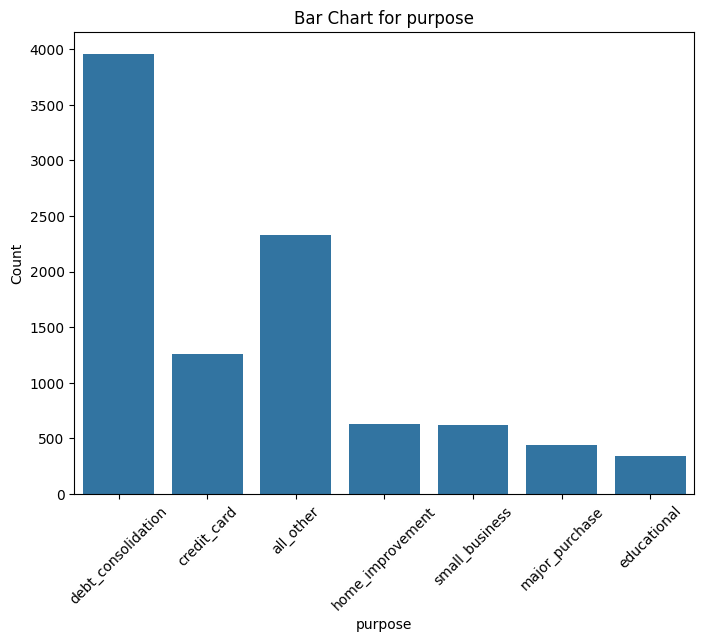

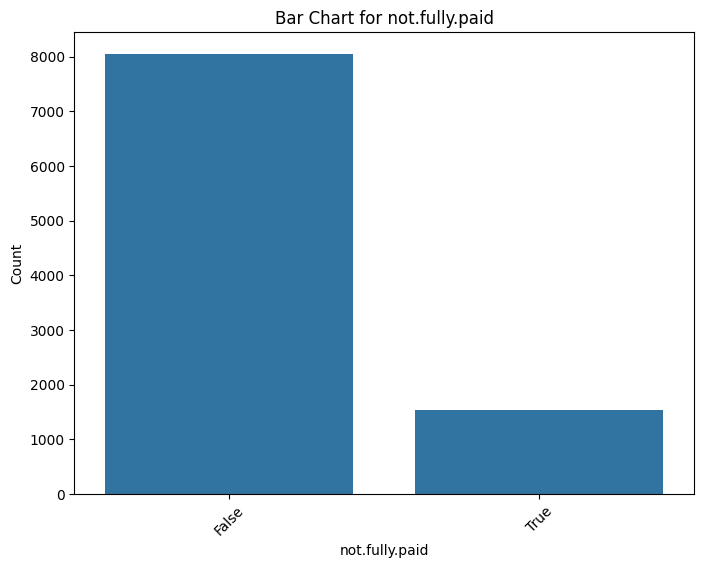

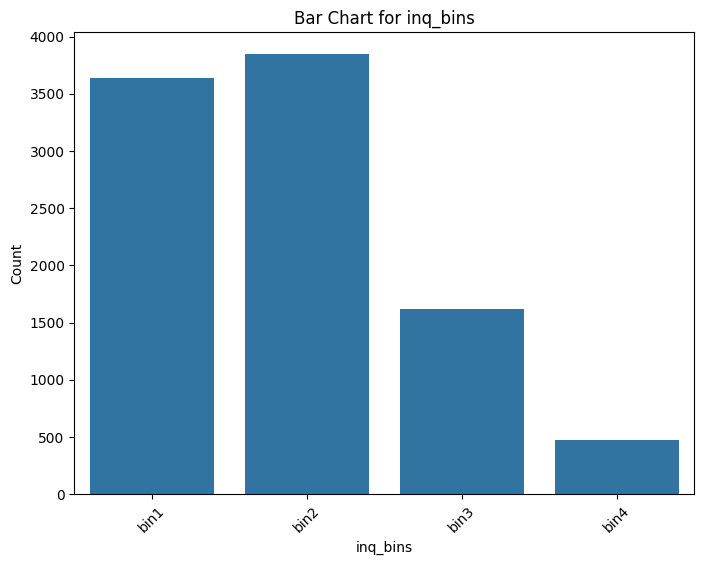

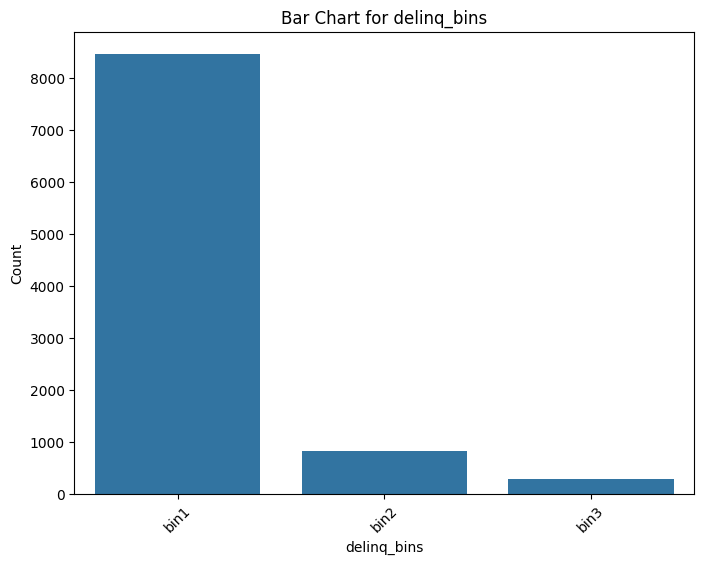

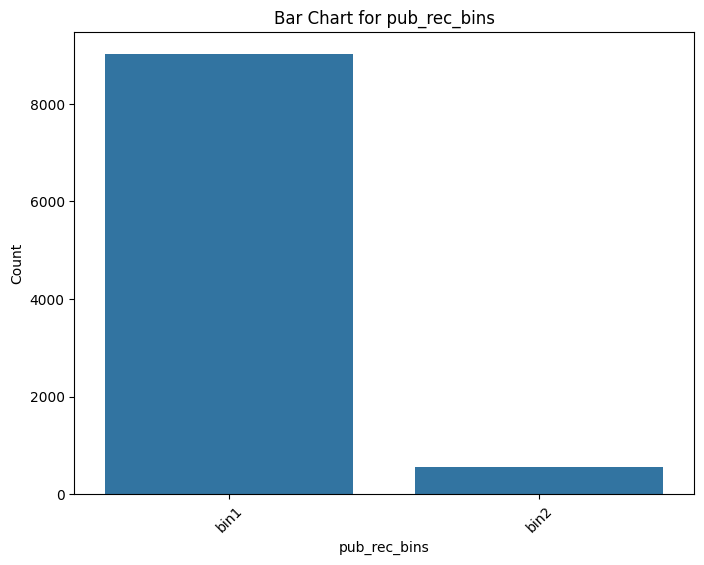

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns (object and boolean types)
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns

# Plot bar charts for each categorical column
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Bar Chart for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [15]:
# Filter the DataFrame for records where 'revol.util' is greater than 100%
revol_util_over_100 = df[df['revol.util'] > 100]

# Display the filtered DataFrame
print("Records where 'revol.util' is greater than 100%:")
print(revol_util_over_100)

Records where 'revol.util' is greater than 100%:
      credit.policy             purpose  int.rate  installment  \
7777          False         credit_card    0.1438        42.96   
7895          False  debt_consolidation    0.1438       149.48   
7914          False  debt_consolidation    0.1186        23.21   
7922          False         credit_card    0.1438       359.95   
7923          False           all_other    0.0933       287.59   
7957          False  debt_consolidation    0.1786        88.41   
7982          False         credit_card    0.1438       137.45   
7991          False           all_other    0.0996        51.60   
8056          False           all_other    0.1059        78.11   
8073          False         educational    0.1375       495.52   
8091          False  debt_consolidation    0.1691       154.90   
8129          False  debt_consolidation    0.1583       701.47   
8176          False  debt_consolidation    0.1425       171.50   
8187          False        

In [16]:
# Filter the DataFrame for records where 'revol.util' is greater than 100%
revol_util_over_100_indices = df[df['revol.util'] > 100].index

# Modify the 'revol.util' values greater than 100 to 100
df.loc[revol_util_over_100_indices, 'revol.util'] = 100

# Display the modified records
print("Modified records where 'revol.util' was greater than 100%:")
print(df.loc[revol_util_over_100_indices])

Modified records where 'revol.util' was greater than 100%:
      credit.policy             purpose  int.rate  installment  \
7777          False         credit_card    0.1438        42.96   
7895          False  debt_consolidation    0.1438       149.48   
7914          False  debt_consolidation    0.1186        23.21   
7922          False         credit_card    0.1438       359.95   
7923          False           all_other    0.0933       287.59   
7957          False  debt_consolidation    0.1786        88.41   
7982          False         credit_card    0.1438       137.45   
7991          False           all_other    0.0996        51.60   
8056          False           all_other    0.1059        78.11   
8073          False         educational    0.1375       495.52   
8091          False  debt_consolidation    0.1691       154.90   
8129          False  debt_consolidation    0.1583       701.47   
8176          False  debt_consolidation    0.1425       171.50   
8187          Fal

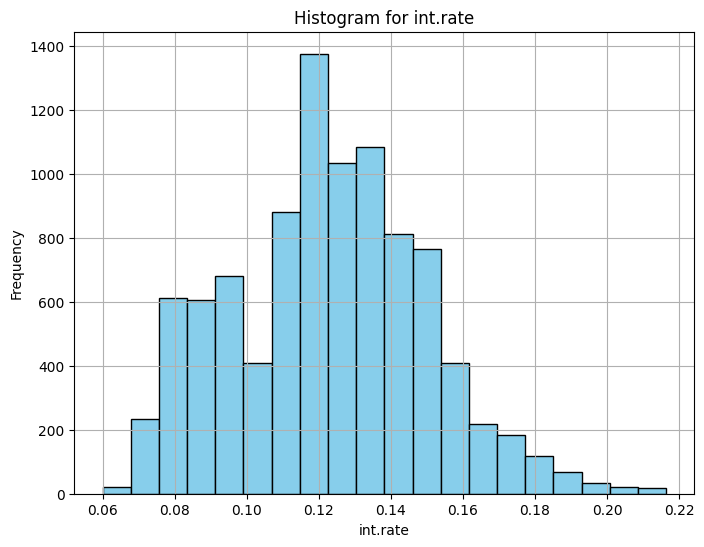

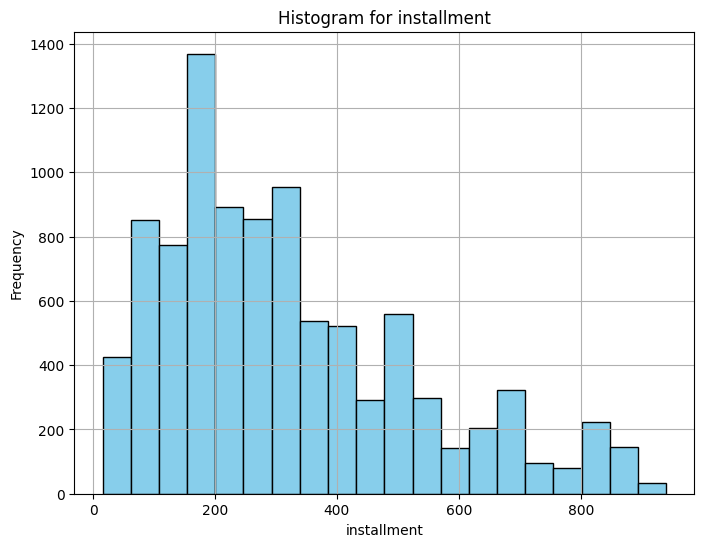

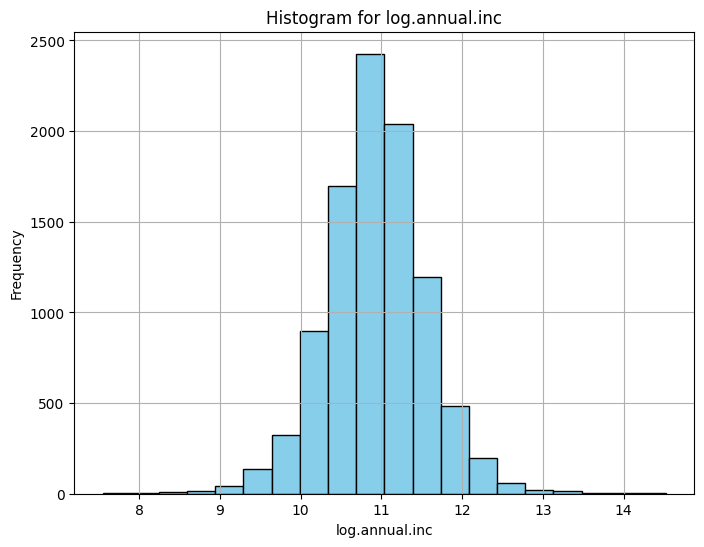

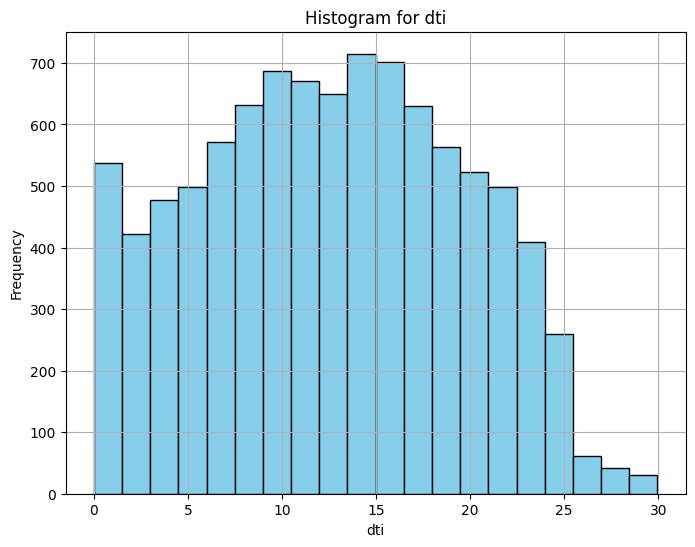

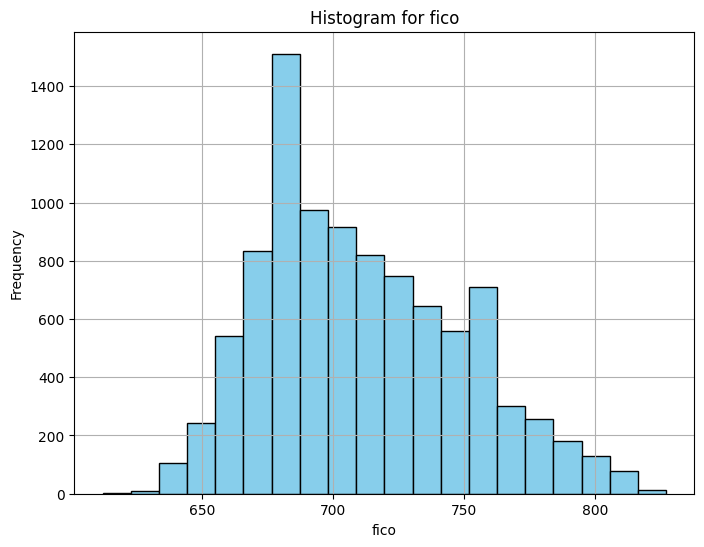

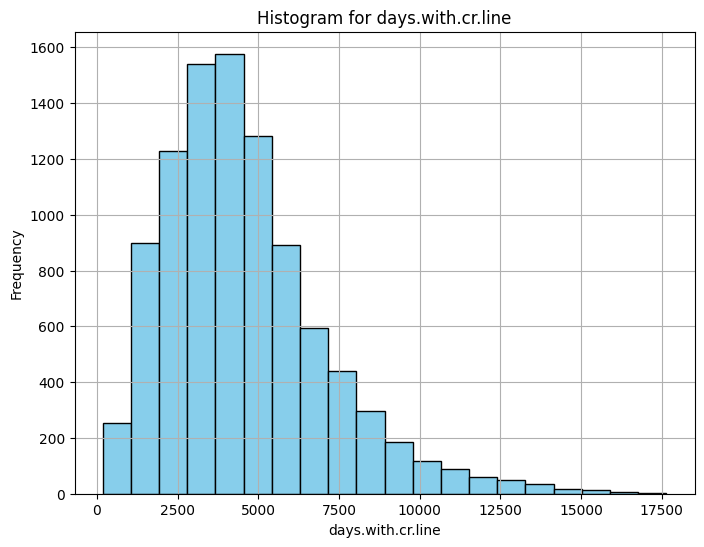

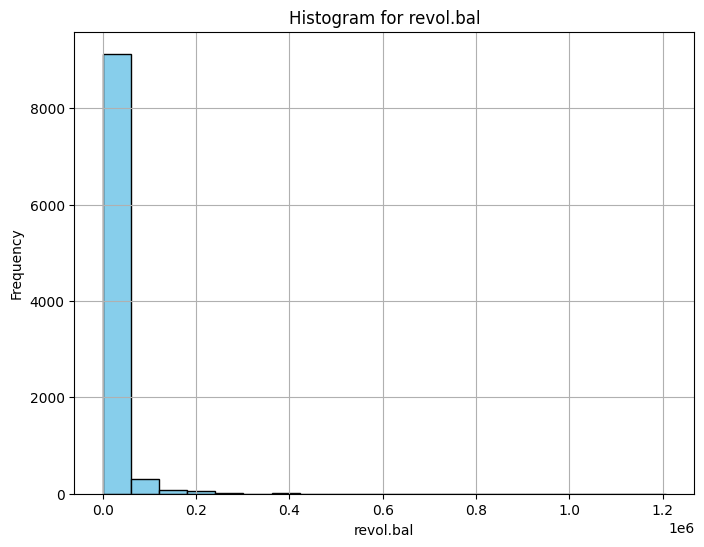

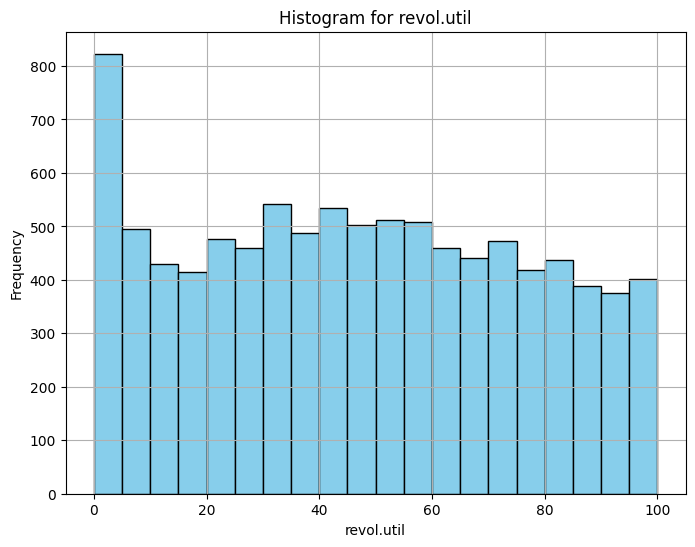

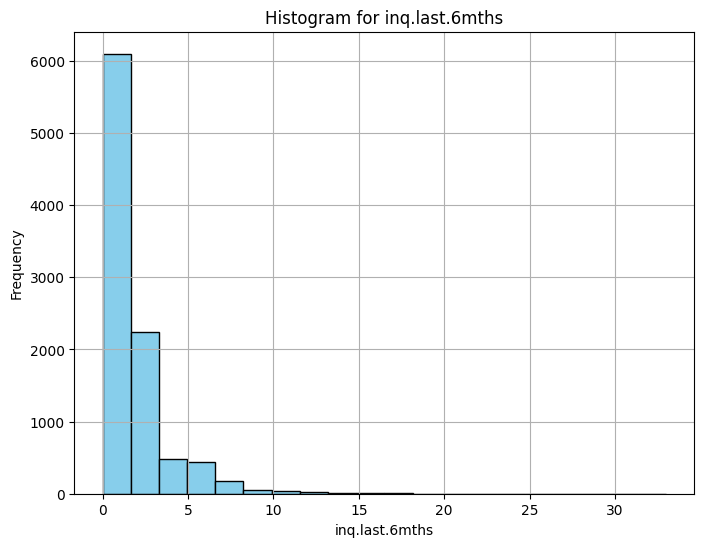

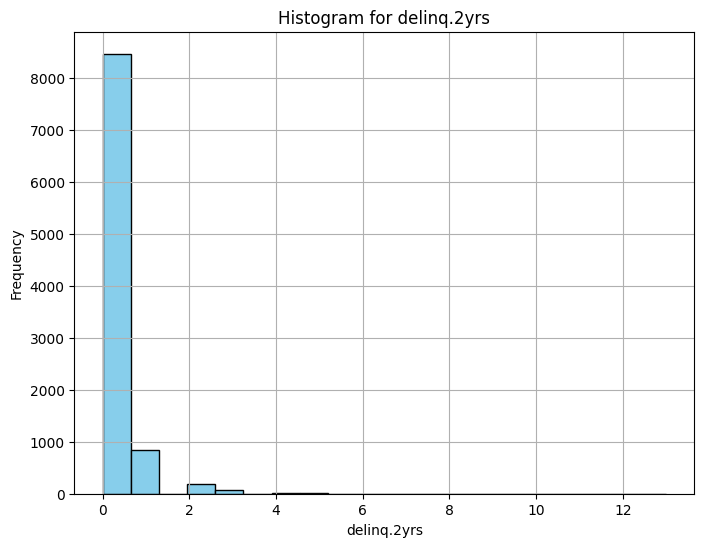

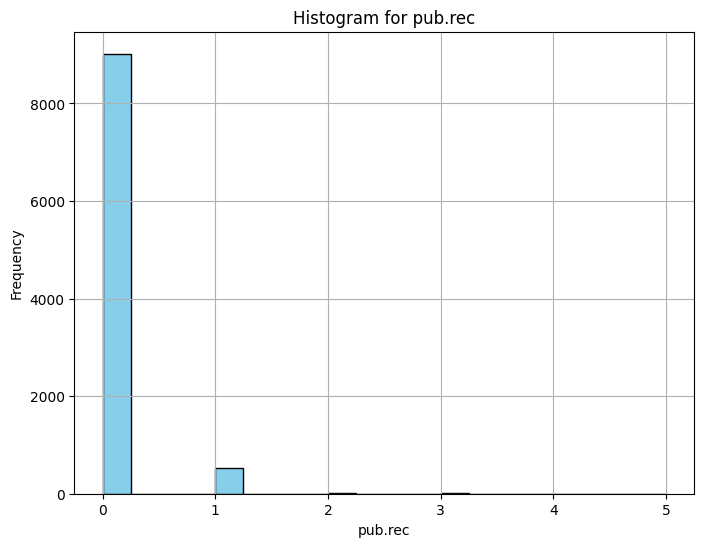

In [17]:
import matplotlib.pyplot as plt

# List of numerical columns (int and float types)
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Plot histograms for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


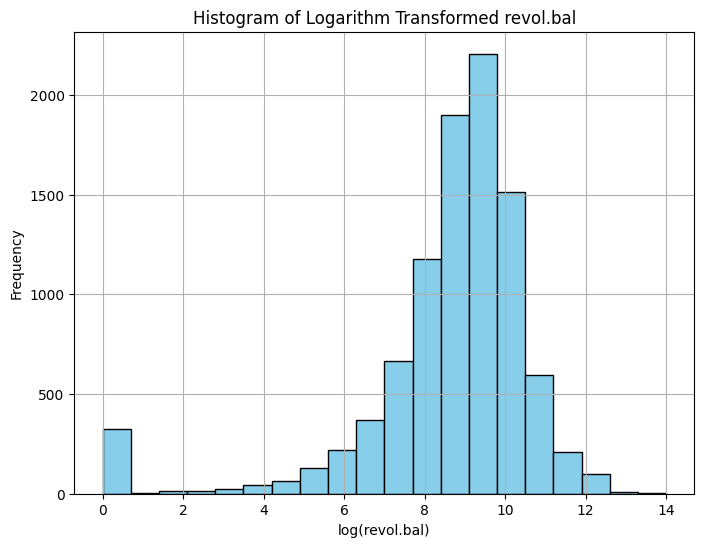

In [18]:
import numpy as np

# Apply logarithm transformation to 'revol.bal'
df['log_revol_bal'] = np.log(df['revol.bal'] + 1)  # Adding 1 to avoid log(0)

# Plot histogram for the transformed feature
plt.figure(figsize=(8, 6))
plt.hist(df['log_revol_bal'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Logarithm Transformed revol.bal')
plt.xlabel('log(revol.bal)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import spearmanr

# Selecting numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

# Calculating correlation matrix
correlation_matrix = df[numerical_columns].corr(method='spearman')

# Displaying correlation matrix
print("Correlation Matrix between numerical features:")
print(correlation_matrix)

# Running Spearman correlation test
print("\nSpearman Correlation Statistical Test:")
for col1 in numerical_columns:
    for col2 in numerical_columns:
        if col1 != col2:
            corr, p_value = spearmanr(df[col1], df[col2])
            print(f"{col1} vs {col2}: Spearman correlation coefficient = {corr}, p-value = {p_value}")

Correlation Matrix between numerical features:
                   int.rate  installment  log.annual.inc       dti      fico  \
int.rate           1.000000     0.242914        0.041648  0.216114 -0.744986   
installment        0.242914     1.000000        0.431405  0.062547  0.085257   
log.annual.inc     0.041648     0.431405        1.000000 -0.059672  0.107878   
dti                0.216114     0.062547       -0.059672  1.000000 -0.214496   
fico              -0.744986     0.085257        0.107878 -0.214496  1.000000   
days.with.cr.line -0.133584     0.201920        0.400251  0.072858  0.251729   
revol.bal          0.148719     0.351844        0.415817  0.375950 -0.094562   
revol.util         0.472965     0.096014        0.053173  0.333658 -0.520085   
inq.last.6mths     0.174137    -0.006740        0.030574  0.028044 -0.173743   
delinq.2yrs        0.172677    -0.007541        0.029732 -0.018420 -0.237059   
pub.rec            0.093887    -0.027854        0.013282  0.009311 -0.148

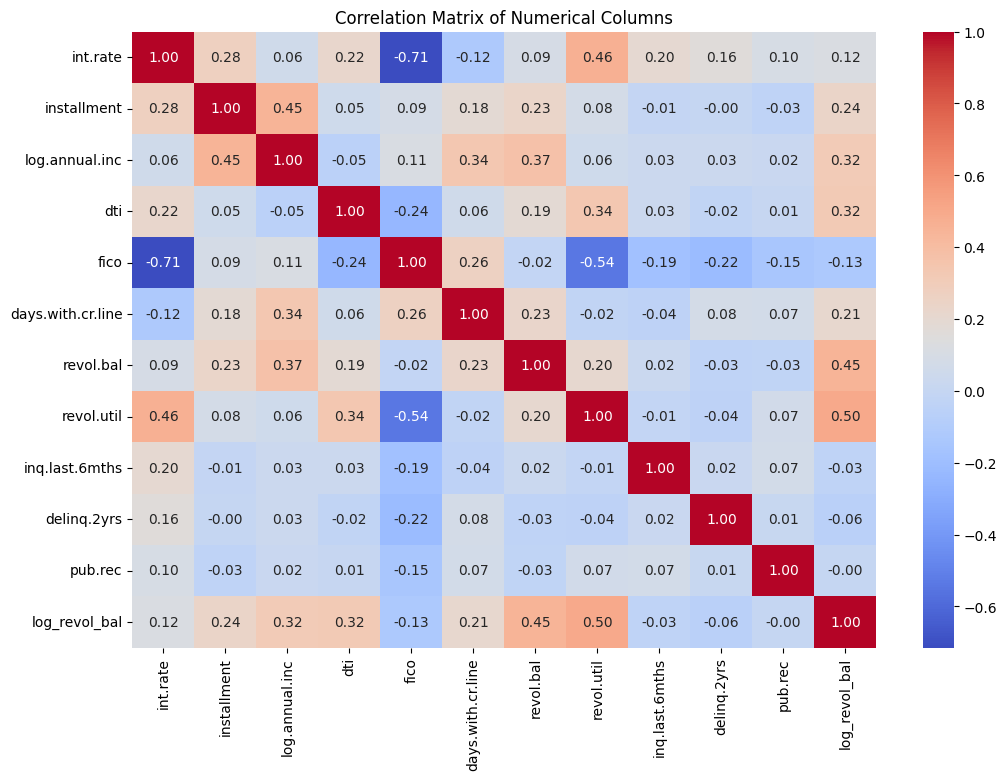

In [20]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming numerical_columns is defined here

# Calculate the correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()


In [21]:
# Perform one-hot encoding for 'purpose'
one_hot_encoded = pd.get_dummies(df['purpose'], prefix='purpose')

# Convert dummy variables to boolean data type
one_hot_encoded = one_hot_encoded.astype(bool)

# Add the one-hot encoded variables to the dataset
df = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original 'purpose' column
df.drop('purpose', axis=1, inplace=True)

# Display the updated DataFrame
print(df.head())


   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0           True    0.1189       829.10       11.350407  19.48   737   
1           True    0.1071       228.22       11.082143  14.29   707   
2           True    0.1357       366.86       10.373491  11.63   682   
3           True    0.1008       162.34       11.350407   8.10   712   
4           True    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  ...  delinq_bins  \
0        5639.958333      28854        52.1               0  ...         bin1   
1        2760.000000      33623        76.7               0  ...         bin1   
2        4710.000000       3511        25.6               1  ...         bin1   
3        2699.958333      33667        73.2               1  ...         bin1   
4        4066.000000       4740        39.5               0  ...         bin2   

   pub_rec_bins  log_revol_bal purpose_all_other purpose_credit_card  \
0       

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   bool   
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   bool   
 13  inq_bins                    9578 

In [23]:
# Drop the 'revol.bal' feature from the DataFrame
df.drop(['revol.bal', 'inq.last.6mths','delinq.2yrs', 'pub.rec'], axis=1, inplace=True)

# Display the updated DataFrame
print(df.head())

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0           True    0.1189       829.10       11.350407  19.48   737   
1           True    0.1071       228.22       11.082143  14.29   707   
2           True    0.1357       366.86       10.373491  11.63   682   
3           True    0.1008       162.34       11.350407   8.10   712   
4           True    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.util  not.fully.paid inq_bins delinq_bins  \
0        5639.958333        52.1           False     bin1        bin1   
1        2760.000000        76.7           False     bin1        bin1   
2        4710.000000        25.6           False     bin2        bin1   
3        2699.958333        73.2           False     bin2        bin1   
4        4066.000000        39.5           False     bin1        bin2   

  pub_rec_bins  log_revol_bal  purpose_all_other  purpose_credit_card  \
0         bin1      10.270039              False       

In [24]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the specified features
df['inq_bins'] = label_encoder.fit_transform(df['inq_bins'])
df['delinq_bins'] = label_encoder.fit_transform(df['delinq_bins'])
df['pub_rec_bins'] = label_encoder.fit_transform(df['pub_rec_bins'])

# Display the updated DataFrame
print(df.head())


   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0           True    0.1189       829.10       11.350407  19.48   737   
1           True    0.1071       228.22       11.082143  14.29   707   
2           True    0.1357       366.86       10.373491  11.63   682   
3           True    0.1008       162.34       11.350407   8.10   712   
4           True    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.util  not.fully.paid  inq_bins  delinq_bins  \
0        5639.958333        52.1           False         0            0   
1        2760.000000        76.7           False         0            0   
2        4710.000000        25.6           False         1            0   
3        2699.958333        73.2           False         1            0   
4        4066.000000        39.5           False         0            1   

   pub_rec_bins  log_revol_bal  purpose_all_other  purpose_credit_card  \
0             0      10.270039            

In [25]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

# Split the data into train and test sets (80% train, 20% test), stratified by 'not.fully.paid'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (7662, 19)
Shape of X_test: (1916, 19)
Shape of y_train: (7662,)
Shape of y_test: (1916,)


In [26]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns in the training set
numerical_columns = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on the training data and transform it
X_train_scaled = X_train.copy()  # Make a copy to avoid modifying the original DataFrame
X_train_scaled[numerical_columns] = scaler.fit_transform(X_train_scaled[numerical_columns])

# Apply the same scaler to the numerical features in the test set
X_test_scaled = X_test.copy()  # Make a copy to avoid modifying the original DataFrame
X_test_scaled[numerical_columns] = scaler.transform(X_test_scaled[numerical_columns])


In [27]:
X_train_scaled.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.util,inq_bins,delinq_bins,pub_rec_bins,log_revol_bal,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
6381,True,0.744534,1.109194,0.696658,0.012171,-0.629324,0.275685,0.952688,1,1,0,0.510377,False,True,False,False,False,False,False
7589,True,-1.779946,-0.795226,0.174696,0.017975,0.689102,0.234302,-0.150510,0,0,0,0.346771,False,True,False,False,False,False,False
465,True,-0.912273,-0.889878,-0.252212,-0.101001,0.161732,0.699294,-0.339532,0,1,0,0.583595,False,False,True,False,False,False,False
5343,True,0.486476,0.096296,1.097154,0.506940,-0.629324,-0.493588,0.086626,1,0,0,-0.571997,True,False,False,False,False,False,False
8016,False,0.318178,0.576044,1.172312,-0.333151,-1.288536,-1.555593,-1.614567,2,0,0,-3.950224,False,False,True,False,False,False,False


In [28]:
X_test_scaled.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.util,inq_bins,delinq_bins,pub_rec_bins,log_revol_bal,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
8157,False,1.212031,0.480230,0.164232,0.399571,-1.684064,-1.078288,0.794597,0,0,0,0.325094,False,False,True,False,False,False,False
1928,True,-1.596687,-1.263839,-0.185788,0.933514,0.557259,0.080371,-0.040534,0,0,0,0.741887,False,False,True,False,False,False,False
2779,True,0.568756,1.751231,1.477852,-0.798900,0.029889,0.210437,-0.745069,0,0,0,0.148504,True,False,False,False,False,False,False
2520,True,0.213459,-1.234983,-2.144838,-0.311387,-0.233796,-0.894542,-1.487408,1,0,0,-0.977857,True,False,False,False,False,False,False
2601,True,1.275610,0.146309,0.027415,-0.726354,-0.761166,-0.684511,-0.439198,1,0,0,-0.509620,False,False,False,False,True,False,False


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Initialize models
log_reg = LogisticRegression()
rf_classifier = RandomForestClassifier()
gbm_classifier = GradientBoostingClassifier()

# List of models
models = [log_reg, rf_classifier, gbm_classifier]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting Machine']

# Iterate over models
for model, name in zip(models, model_names):
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate the model
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))

Logistic Regression Cross-Validation Accuracy: 0.8408 (+/- 0.0021)
Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.84      1.00      0.91      1609
        True       0.64      0.02      0.04       307

    accuracy                           0.84      1916
   macro avg       0.74      0.51      0.48      1916
weighted avg       0.81      0.84      0.77      1916

Random Forest Cross-Validation Accuracy: 0.8395 (+/- 0.0028)
Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.99      0.91      1609
        True       0.39      0.02      0.04       307

    accuracy                           0.84      1916
   macro avg       0.62      0.51      0.48      1916
weighted avg       0.77      0.84      0.77      1916

Gradient Boosting Machine Cross-Validation Accuracy: 0.8384 (+/- 0.0035)
Gradient Boosting Machine Classification Report:
              pr

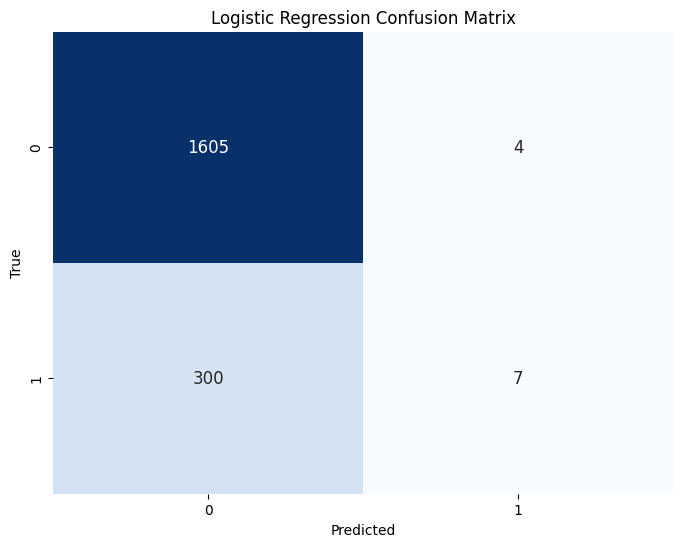

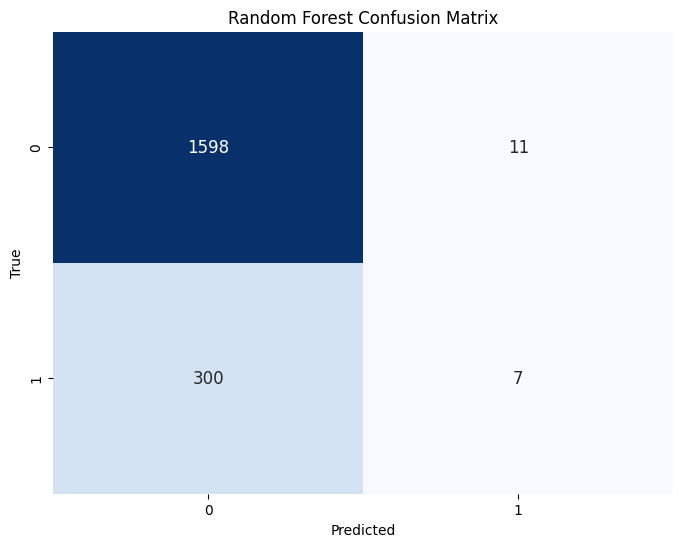

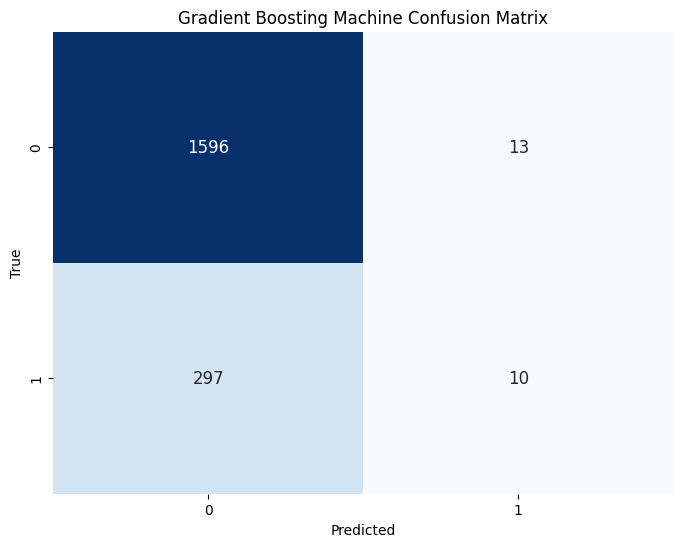

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the models and their names
models = [log_reg, rf_classifier, gbm_classifier]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting Machine']

# Iterate over models
for model, name in zip(models, model_names):
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'fontsize': 12})
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
